# ASSIGNMENT 3: Clustering and Classification
## Data Engineering

## Table of Content:

1) [Clustering:](#1)
- [Importing Data:](#2)
- [Cleaning Data:](#3)

2) [K Means](#4)

3) [K Means++](#5)

4) [Hierarchical clustering and dendogram:](#6)

5) [Density CLustering:](#7)

6) [Spectre CLustering:](#8)

7) [Prediction with Regression Classification](#9)

8) [Data Cleaning:](#10)

9) [Linear Regression:](#11)

10) [Classification:](#12)




<a id = "back"></a>
[Back to table of content](#back)
<a id = "8"></a>

# Clustering: 
### Group similar things together, while separating dissimilar things. For numerical data in Euclidean space, the most common way to identify the location of a cluster is by finding the mean of its points, which corresponds to its center of mass. This point is called the CENTROID. It is the geometrical center, and is found with a straightforward mean calculation.

### For data in non-Euclidean space, the story gets a bit more complicated. 
*Examples of non-Euclidean space are string comparison features,and mixed data that has both categorical and numerical data. In these cases, a geometrical center does not exist so we need a different strategy. 

### The most common solution is to identify a MEDIOID in each cluster. A MEDIOID is the data point that is closest to the other points in the cluster. It must be one of the actual data points in the set, and can be thought of as the best representative of that cluster. 

### How do you define "closest"? It is commonly found by looking for the lowest score on one of the following metrics:
###   1- The maximum distance to other points in cluster
###   2- The mean distance to all other points in cluster
###   3- The sum-of-squares distance to all other points

<a id = "1"></a>

In [1]:
# import datasets module from Sci-kit learn
from sklearn import datasets
# import other libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Importing Data:
<a id = "2"></a>

In [330]:

#reading csv data file
df_main = pd.read_csv("C:/Users/shrey/OneDrive/Desktop/Data Engineering/HWK 3 - Financial/HWK 3 - Financial/data/companylist.csv")

In [331]:
# Data Preview
df_main.head()

,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote
0,DDD,3D Systems Corporation,21.92,$2.45B,NaN,Technology,Computer Software: Prepackaged Software,http://www.nasdaq.com/symbol/ddd
1,MMM,3M Company,160.16,$101.6B,NaN,Health Care,Medical/Dental Instruments,http://www.nasdaq.com/symbol/mmm
2,WBAI,500.com Limited,22.00,$773.44M,2013.0,Consumer Services,Services-Misc. Amusement & Recreation,http://www.nasdaq.com/symbol/wbai
3,WUBA,58.com Inc.,76.16,$6.92B,2013.0,Technology,"Computer Software: Programming, Data Processing",http://www.nasdaq.com/symbol/wuba
4,AHC,A.H. Belo Corporation,5.92,$128.76M,NaN,Consumer Services,Newspapers/Magazines,http://www.nasdaq.com/symbol/ahc


In [332]:
df_main.describe()

,LastSale,IPOyear
count,3287.000000,1348.000000
mean,103.994095,2005.898368
std,3743.034390,8.073212
min,0.018000,1985.000000
25%,14.420000,2001.750000
50%,25.157900,2009.000000
75%,43.095000,2013.000000
max,214600.000000,2015.000000


## Cleaning Data:
- Drop the un wanted columns
- K mean clustering is not string friendly so we will covert these strings to integers i.e Encoding of categories
<a id = "3"></a>

In [333]:
# Dropping columns that are not informative
df_main =df_main.drop(["Summary Quote","Name"], axis=1)
# Preview
df_main.head()

,Symbol,LastSale,MarketCap,IPOyear,Sector,industry
0,DDD,21.92,$2.45B,NaN,Technology,Computer Software: Prepackaged Software
1,MMM,160.16,$101.6B,NaN,Health Care,Medical/Dental Instruments
2,WBAI,22.00,$773.44M,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,76.16,$6.92B,2013.0,Technology,"Computer Software: Programming, Data Processing"
4,AHC,5.92,$128.76M,NaN,Consumer Services,Newspapers/Magazines


### Converting string categories to number categories :

In [334]:
# Converting column to category column
df_main["Sector"] = pd.Categorical(df_main["Sector"])
df_main["industry"] = pd.Categorical(df_main["industry"])
df_main["Symbol"] = pd.Categorical(df_main["Symbol"])
# Giving category codes
df_main['Sector_code'] = df_main["Sector"].cat.codes
df_main['industry_code'] = df_main["industry"].cat.codes
df_main['Symbol_code'] = df_main["Symbol"].cat.codes

# Dropping the column
df_main = df_main.drop(["Sector","industry"], axis =1)

#setting Symbol as index
df_main.set_index("Symbol", inplace=True)

In [335]:
# Converting MarketCap B and M to numbers
df1 = df_main['MarketCap'].str.strip('$').str.extract(r'(\d+\.\d+)([BM]+)')
df_main['MarketCap'] = df1[0].astype(float) * df1[1].map({'B': 1000000000, 'M':1000000})

In [336]:
#Preview of final DataFrame
df_main.head()

,LastSale,MarketCap,IPOyear,Sector_code,industry_code,Symbol_code
Symbol,,,,,,
DDD,21.92,2.450000e+09,NaN,10,28,800
MMM,160.16,1.016000e+11,NaN,7,72,1912
WBAI,22.00,7.734400e+08,2013.0,4,115,3151
WUBA,76.16,6.920000e+09,2013.0,10,29,3235
AHC,5.92,1.287600e+08,NaN,4,82,91


In [9]:
# Filling NaN values with 0
df_main = df_main.fillna(0)

In [10]:
#Preview of final DataFrame
df_main.head()

,LastSale,MarketCap,IPOyear,Sector_code,industry_code,Symbol_code
Symbol,,,,,,
DDD,21.92,2.450000e+09,0.0,10,28,800
MMM,160.16,1.016000e+11,0.0,7,72,1912
WBAI,22.00,7.734400e+08,2013.0,4,115,3151
WUBA,76.16,6.920000e+09,2013.0,10,29,3235
AHC,5.92,1.287600e+08,0.0,4,82,91


# K-means
### 1. Pick the k initial cluster centers at random from points in the input data
### 2. Assign all the data points to the cluster to which they are closest to
### 3. Move the k centroids to the center of all the points inside the newly created clusters
### 4. Repeat until k clusters stop changing (for example, convergence)

## This method uses centroids to define location, Euclidean distance as similarity metric, and cohesion as the quality score. Termination occurs when the quality score converges, as measured by a change to less than the tolerance amount. The K-means++ and mini batch variants in the K-means family are introduced later in the section. 
<a id = "4"></a>

In [11]:

# import module and instantiate K-means object
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=10, tol=0.004, max_iter=300)

In [12]:
# fit to input main Dataframe
df = df_main.copy()

clus.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.004, verbose=0)

In [13]:
# get cluster assignments of input data and print first five labels
df['K-means Cluster Labels'] = clus.labels_
print(df['K-means Cluster Labels'][:5].tolist())

[0, 3, 0, 6, 0]


In [14]:
df.head()

,LastSale,MarketCap,IPOyear,Sector_code,industry_code,Symbol_code,K-means Cluster Labels
Symbol,,,,,,,
DDD,21.92,2.450000e+09,0.0,10,28,800,0
MMM,160.16,1.016000e+11,0.0,7,72,1912,3
WBAI,22.00,7.734400e+08,2013.0,4,115,3151,0
WUBA,76.16,6.920000e+09,2013.0,10,29,3235,6
AHC,5.92,1.287600e+08,0.0,4,82,91,0


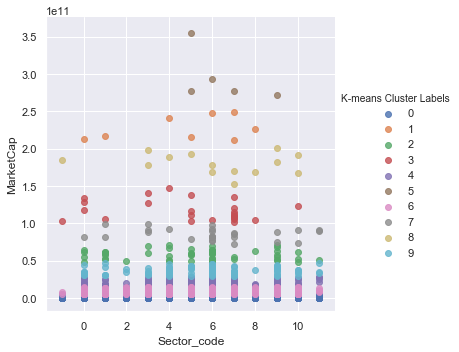

In [15]:
# Now, let's use Seaborn's scatter plot to visualize 
# the grouping of the DataFrame set with the cluster labels displayed
sns.lmplot(x='Sector_code', y='MarketCap', 
           hue="K-means Cluster Labels", data=df, fit_reg=False)

## We can see how clustering was done considering the Market Cap as we can see the stocks with similar colors in same Market Cap range

In [16]:
df.head()

,LastSale,MarketCap,IPOyear,Sector_code,industry_code,Symbol_code,K-means Cluster Labels
Symbol,,,,,,,
DDD,21.92,2.450000e+09,0.0,10,28,800,0
MMM,160.16,1.016000e+11,0.0,7,72,1912,3
WBAI,22.00,7.734400e+08,2013.0,4,115,3151,0
WUBA,76.16,6.920000e+09,2013.0,10,29,3235,6
AHC,5.92,1.287600e+08,0.0,4,82,91,0


## Finding k with silhouette:

### *find best value for k using silhouette score*

In [17]:
# import metrics module
from sklearn import metrics

# main Dataframe
df = df_main.copy()
# create list of k values to test and then use for loop
n_clusters = [2,3,4,5,6,7,8]
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df)
    cluster_labels = kmeans.predict(df)
    S = metrics.silhouette_score(df, cluster_labels)
    print("n_clusters = {:d}, silhouette score {:1f}".format(k, S))
# 5 clusters will be our choice


n_clusters = 2, silhouette score 0.926054
n_clusters = 3, silhouette score 0.879872
n_clusters = 4, silhouette score 0.849506
n_clusters = 5, silhouette score 0.801245
n_clusters = 6, silhouette score 0.801717
n_clusters = 7, silhouette score 0.768405
n_clusters = 8, silhouette score 0.760425


## k-means++: 
<a id = "5"></a>

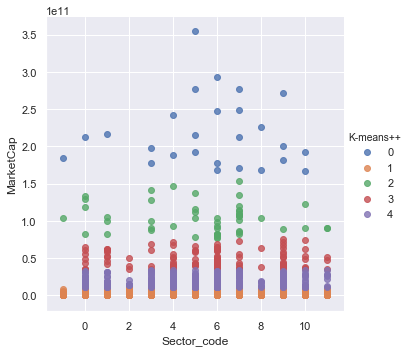

In [18]:
# main Dataframe
df = df_main.copy()
# instantiate k-means object with k-means++ init method
clus = KMeans(n_clusters=5, init='k-means++',
              tol=0.004, max_iter=300).fit(df)

# get cluster assignments of input data and print first five labels
df['K-means++'] = clus.labels_

# Now, let's use Seaborn's scatter plot to visualize 
# the grouping of a blob set with the cluster labels displayed
sns.lmplot(x='Sector_code', y='MarketCap', 
           hue="K-means++", data=df, fit_reg=False)

## k-means mini batch:

In [19]:
# main Dataframe
df = df_main.copy()
# import module and instantiate k-means mini batch object
from sklearn.cluster import MiniBatchKMeans
clus = MiniBatchKMeans(n_clusters=5, batch_size=50,
                        tol=0.004, max_iter=300)


## Hierarchical clustering and dendogram: 
### The goal of hierarchical clustering is to merge similar clusters in a hierarchical fashion. The plot of clusters connected in a hierarchical fashion is called a dendrogram. So, if you consider all available clusters as candidates for merging, the with the lowest pairwise linkage will be chosen for merger. 

## The hierarchical clustering analysis algorithm (HCA) can be written in two different ways. 
- The first is in the agglomerative fashion, which starts with every data point being in its own cluster, then moving up and merging all the way to a single-cluster hierarchy. 
- The second way is divisive in nature and starts with all data points assigned to a single huge cluster, then moves in the opposite direction. 
### Agglomerative clustering is much more common in data mining. 
<a id = "6"></a>
[Back to table of content](#back)


In [20]:
# import module and instantiate HCA object
from sklearn.cluster import AgglomerativeClustering
clus = AgglomerativeClustering(n_clusters=5, 
                               affinity='euclidean', linkage='ward')

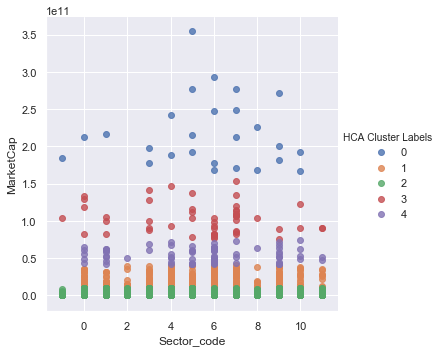

In [21]:
# Main DataFrame
df = df_main.copy()

# fit to input data
clus.fit(df)

# get cluster assignments
df['HCA Cluster Labels'] = clus.labels_

sns.lmplot(x='Sector_code', y='MarketCap', 
           hue="HCA Cluster Labels", data=df, fit_reg=False)

### You only have to build the dendrogram once during an analysis. You can change the level of hierarchyused in the algorithm by simply moving the distance cutoff (the dotted line in our dendrogram) up and down. 

### Since the level of hierarchy controls thenumber of clusters, you can use this to tune the quality of your clustering.

## The following is an example code for reusing the dendrogram and fitting multiple times:
 ### *find optimal number of clusters using silhouette score*

In [22]:
# import metrics module and plot dendogram 
from sklearn import metrics

# import module and instantiate HCA object
from sklearn.cluster import AgglomerativeClustering


In [23]:
# Main Dataframe
df = df_main.copy()
# create list of k values to test and then use for loop
n_clusters = [2,3,4,5,6,7,8]
for num in n_clusters:
    HCA = AgglomerativeClustering(n_clusters=num, 
                               affinity='euclidean', linkage='ward',
                               memory='./model_storage/dendrogram', 
                               compute_full_tree=True)
    cluster_labels= HCA.fit_predict(df)
    S = metrics.silhouette_score(df, cluster_labels)
    print("n_clusters = {:d}, silhouette score {:1f}".format(num, S))

n_clusters = 2, silhouette score 0.926332
n_clusters = 3, silhouette score 0.808052
n_clusters = 4, silhouette score 0.811308
n_clusters = 5, silhouette score 0.806676
n_clusters = 6, silhouette score 0.806712
n_clusters = 7, silhouette score 0.769879
n_clusters = 8, silhouette score 0.768768


In [24]:
# plot
# import scipy module
from scipy.cluster import hierarchy

In [25]:
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward') 

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [52.5, 52.5, 80.0, 80.0],
  [30.0, 30.0, 66.25, 66.25],
  [10.0, 10.0, 48.125, 48.125],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [162.5, 162.5, 193.75, 193.75],
  [140.0, 140.0, 178.125, 178.125],
  [110.0, 110.0, 159.0625, 159.0625],
  [29.0625, 29.0625, 134.53125, 134.53125],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [250.0, 250.0, 280.0, 280.0],
  [230.0, 230.0, 265.0, 265.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [3

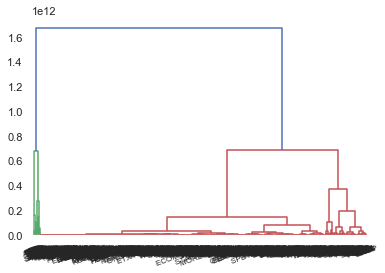

In [28]:
# Plot with Custom leaves (scroll down in console to see plot)
hierarchy.dendrogram(Z, leaf_rotation=20, leaf_font_size=8, labels=df.index)

## Density clustering:
- ### As opposed to defining similarity as solely a measure of distance between points, density clustering adds a correction for space covered by those points. 
- ### After this correction, the number of points in a given space matters when defining clusters. 
- ### As a consequence density clustering is very good at denoising, which means to exclude noisy outlier points when they lie outside the dense areas of the data. 
- ### This clustering method also does not require you to know the number of clusters before you run the fit routine.

### *The most popular density clustering algorithm is called DBSCAN, and uses the cohesion concept to restrict the definition of density to include only data points within the cluster.*
[Back to table of content](#back)
<a id = "7"></a>

## An example of applying DBSCAN in Scikit-learn is included in the following code:

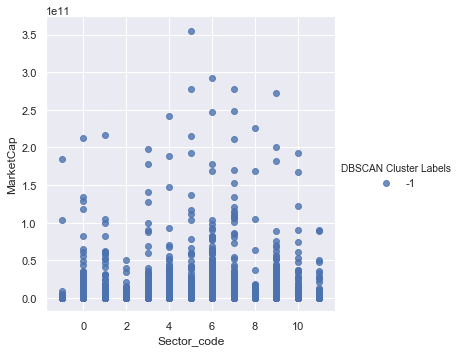

In [29]:
# import module and instantiate DBSCAN object
from sklearn.cluster import DBSCAN
clus = DBSCAN(eps=0.9, min_samples=5, metric='euclidean')

# Main DataFrame
df = df_main.copy()

# fit to input data
clus.fit(df)

# get cluster assignments
df['DBSCAN Cluster Labels'] = clus.labels_

sns.lmplot(x='Sector_code', y='MarketCap', hue="DBSCAN Cluster Labels", data=df, fit_reg=False)

## Spectral analysis:
- ### Spectral clustering builds a connection graph and groups points based on the connectivity of its constituent nodes. 
- ### Unlike density clustering, you do have to know the number of clusters at fit time. 
- ### A similarity matrix is built that compares the affinity of each data point to the rest of the points. 
- ###  Then, similar to the principal component analysis introduced in the previous chapter, eigenvectors are found, and the data is transformed into this new affinity space. 

- ### Finally, a conventional clustering algorithm, such as K-means, is used to cluster the data in affinity space. 

## An example of applying spectral clustering in Scikit-learn is included in the following code:
[Back to table of content](#back)
<a id = "8"></a>

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


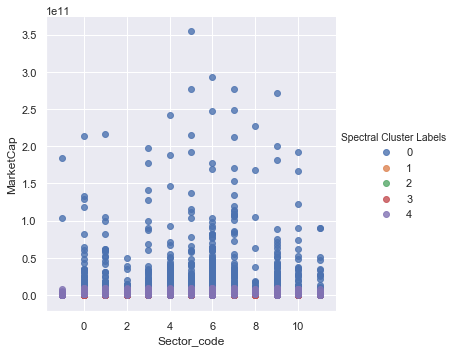

In [30]:
# import module and instantiate spectral clustering object
from sklearn.cluster import SpectralClustering

clus = SpectralClustering(n_clusters=5, random_state=42, 
                          assign_labels='kmeans', n_init=10,
                          affinity='nearest_neighbors', n_neighbors=10)
# Main DataFrame
df = df_main.copy()
# fit to input data
clus.fit(df)

# get cluster assignments
df['Spectral Cluster Labels'] = clus.labels_

sns.lmplot(x='Sector_code', y='MarketCap', hue="Spectral Cluster Labels", data=df, fit_reg=False)


# Prediction with regression and classification:


[Back to table of content](#back)
<a id = "9"></a>

In [42]:
# regression example
# import modules
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [105]:
# Importing the library
import yfinance as yf

# Making a ticker 
AMZN = yf.Ticker("AMZN")

In [41]:
Stock_list = ['AAPL',
 'MSFT',
 'KEY',
 'RTX',
 'GILD',
 'CARR',
 'WFC',
 'FCX',
 'OXY',
 'BMY',
 'TSLA',
 'ROKU',
 'MRNA',
 'DAL',
 'WORK',
 'LUV',
 'MPC',
 'ET',
 'CVX',
 'ABT',
 'ORCL',
 'CMCSA',
 'NVDA',
 'SNAP',
 'CSCO',
 'XOM',
 'NFLX',
 'NOK',
 'DIS',
 'F',
 'TWTR',
 'BAC',
 'PFE',
 'KO',
 'SLB',
 'WMB',
 'MRK',
 'HPQ',
 'T',
 'SIRI',
 'KR',
 'VZ',
 'INTC',
 'SQ',
 'JPM',
 'EBAY',
 'PG',
 'IBN',
 'GM',
 'KMI',
 'ABEV',
 'INFY',
 'V',
 'PBR',
 'ITUB',
 'VALE',
 'GOLD',
 'SCHW',
 'UBER',
 'MU',
 'FB',
 'BSX',
 'BABA',
 'GE',
 'TJX',
 'MS',
 'AMD',
 'JD',
 'BP',
 'BA',
 'SBUX',
 'C',
 'NRZ',
 'AMRN',
 'NCLH',
 'PE',
 'CIG',
 'APA',
 'CVE',
 'NIO',
 'MRO',
 'AUY',
 'AAL',
 'PAA',
 'VER',
 'CZR',
 'GFI',
 'TGE',
 'HAL',
 'MGM',
 'UAL',
 'ZNGA',
 'KGC',
 'RCL',
 'HST',
 'HBAN',
 'CFG',
 'NLY',
 'RF',
 'CCL']

In [44]:
# Making a dataset to work with:
df_list = []
for a in Stock_list:
    print(a)
    # Making a ticker 
    data = yf.Ticker(a)
    # data 
    try:
        data = data.info
    except Exception:
        pass
    # make a dataframe
    df = pd.DataFrame([data])
    # add to the list
    df_list.append(df)
    
#Concat the dfs   
df = pd.concat(df_list)

AAPL
MSFT
KEY
RTX
GILD
CARR
WFC
FCX
OXY
BMY
TSLA
ROKU
MRNA
DAL
WORK
LUV
MPC
ET
CVX
ABT
ORCL
CMCSA
NVDA
SNAP
CSCO
XOM
NFLX
NOK
DIS
F
TWTR
BAC
PFE
KO
SLB
WMB
MRK
HPQ
T
SIRI
KR
VZ
INTC
SQ
JPM
EBAY
PG
IBN
GM
KMI
ABEV
INFY
V
PBR
ITUB
VALE
GOLD
SCHW
UBER
MU
FB
BSX
BABA
GE
TJX
MS
AMD
JD
BP
BA
SBUX
C
NRZ
AMRN
NCLH
PE
CIG
APA
CVE
NIO
MRO
AUY
AAL
PAA
VER
CZR
GFI
TGE
HAL
MGM
UAL
ZNGA
KGC
RCL
HST
HBAN
CFG
NLY
RF
CCL


## Data Cleaning:
- Dropping columns with NULL values above 70%
- Dropping columns which is not useful in predictive
[Back to table of content](#back)
<a id = "10"></a>


In [242]:
# Preview before Cleaning
print("Preview shape before Data Cleaning:", df.shape)

Preview shape before Data Cleaning: (100, 91)


In [243]:
# Checking for columns with null values
null_columns=df.columns[df.isnull().any()]

#dropping columns that has more than 70% null values
for a in null_columns:
    if df[a].isnull().sum()/100 > .70:
        df = df.drop(a, axis=1)

In [293]:
# Dropping more columns that we dont need 
drop_col = ["website","logo_url","address1","zip","shortName",
            "longBusinessSummary","companyOfficers","phone","zip",
            "gmtOffSetMilliseconds","dateShortInterest","shortName",
            "quoteType","address1","city","country","address1","exchangeTimezoneName",
            "exchangeTimezoneShortName","logo_url","market","maxAge","symbol","currency",
           "state","city","exchange","longName","tradeable","isEsgPopulated","lastSplitFactor",
           "messageBoardId","SandP52WeekChange"]
df_clean = df.drop(drop_col, axis=1)

In [294]:
df_clean.fillna(df_clean.mean(), inplace=True)

In [295]:
# Preview after cleaning
print("Preview shape after Data Cleaning:", df_clean.shape)

Preview shape after Data Cleaning: (100, 64)


In [296]:
df_clean.head()

,52WeekChange,ask,askSize,averageDailyVolume10Day,averageVolume,averageVolume10days,beta,bid,bidSize,bookValue,...,sharesShortPreviousMonthDate,sharesShortPriorMonth,shortPercentOfFloat,shortRatio,trailingAnnualDividendRate,trailingAnnualDividendYield,trailingEps,trailingPE,twoHundredDayAverage,volume
0,0.295472,275.78,1100.0,40725771.0,51061800.0,40725771.0,1.173542,275.65,1000.0,20.418000,...,1.582848e+09,29008504.0,0.0089,0.55,3.040000,0.011328,12.595000,21.921398,276.165740,27955460.0
0,0.342453,173.19,900.0,47395228.0,54901149.0,47395228.0,0.962017,173.46,800.0,14.467000,...,1.582848e+09,37031775.0,0.0077,0.80,1.940000,0.011560,5.741000,30.224699,157.216980,32736964.0
0,-0.397548,10.38,1300.0,14833214.0,14158438.0,14833214.0,1.618860,10.23,3000.0,15.904000,...,1.582848e+09,14981875.0,0.0180,0.81,0.725000,0.070252,1.364000,7.500000,17.035074,13370772.0
0,-0.286834,63.60,4000.0,13894171.0,13924118.0,13894171.0,1.425671,63.20,1000.0,14.090243,...,1.581638e+09,9777568.0,0.0132,1.25,1.206786,0.054370,0.887811,30.709355,117.166970,8698021.0
0,0.250478,81.25,1000.0,29750028.0,22921617.0,29750028.0,0.686313,81.31,1200.0,17.792000,...,1.582848e+09,23757054.0,0.0188,0.89,2.520000,0.032090,4.220000,19.267773,68.226470,13570502.0


## Encode Categorical String values:

In [298]:
# Converting column to category column
df_clean["sector"] = pd.Categorical(df_clean["sector"])
df_clean["industry"] = pd.Categorical(df_clean["industry"])
# Giving category codes
df_clean['sector_code'] = df_clean["sector"].cat.codes
df_clean['industry_code'] = df_clean["industry"].cat.codes

# Dropping the column
df_clean = df_clean.drop(["sector","industry"], axis =1)


In [299]:
df_clean.to_csv(r'C:/Users/shrey/OneDrive/Desktop/Data Engineering/Data_Source/stock.csv', index = False)

# Creating target variable:
- We will use volume to create target variable

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


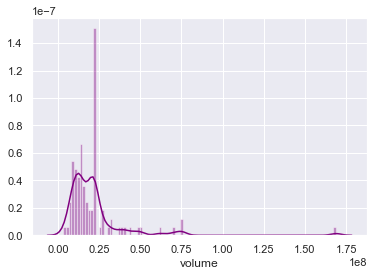

In [300]:
sns.distplot(df_clean['volume'].dropna(),bins=100,color='purple')

In [301]:
print("Max volume",df["volume"].max())
print("average volume",df_clean["volume"].mean())
mn = df_clean["volume"].mean()

Max volume 168926836.0
average volume 21837790.82051281


### we can see the spread of the volume in the above graph and there are some outlier companies with high volumes

## Using mean as the threshold between large cap and small cap company. 
- since there are more companies in the small cap chances are that model will be biased towards them.
- 0 is for small_caps and 1 for large_caps

In [302]:
df_clean["target"] = "0"
df_clean["target"].loc[df_clean["volume"] >= mn] = "1"

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [303]:
df_clean

,52WeekChange,ask,askSize,averageDailyVolume10Day,averageVolume,averageVolume10days,beta,bid,bidSize,bookValue,...,shortRatio,trailingAnnualDividendRate,trailingAnnualDividendYield,trailingEps,trailingPE,twoHundredDayAverage,volume,sector_code,industry_code,target
0,0.295472,275.780000,1100.000000,4.072577e+07,5.106180e+07,4.072577e+07,1.173542,275.650000,1000.000000,20.418000,...,0.550000,3.040000,0.011328,12.595000,21.921398,276.165740,2.795546e+07,9,13,1
0,0.342453,173.190000,900.000000,4.739523e+07,5.490115e+07,4.739523e+07,0.962017,173.460000,800.000000,14.467000,...,0.800000,1.940000,0.011560,5.741000,30.224699,157.216980,3.273696e+07,9,36,1
0,-0.397548,10.380000,1300.000000,1.483321e+07,1.415844e+07,1.483321e+07,1.618860,10.230000,3000.000000,15.904000,...,0.810000,0.725000,0.070252,1.364000,7.500000,17.035074,1.337077e+07,5,5,0
0,-0.286834,63.600000,4000.000000,1.389417e+07,1.392412e+07,1.389417e+07,1.425671,63.200000,1000.000000,14.090243,...,1.250000,1.206786,0.054370,0.887811,30.709355,117.166970,8.698021e+06,7,0,0
0,0.250478,81.250000,1000.000000,2.975003e+07,2.292162e+07,2.975003e+07,0.686313,81.310000,1200.000000,17.792000,...,0.890000,2.520000,0.032090,4.220000,19.267773,68.226470,1.357050e+07,6,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.432314,8.000000,21500.000000,1.263387e+07,1.448760e+07,1.263387e+07,1.644400,7.970000,1300.000000,10.384000,...,1.480000,0.580000,0.074359,1.270000,6.330709,12.918383,1.598098e+07,5,5,0
0,-0.461324,19.750000,1200.000000,7.718857e+06,6.775090e+06,7.718857e+06,1.842829,19.520000,1400.000000,47.775000,...,0.830000,1.430000,0.074132,2.950000,6.637288,33.476986,5.485174e+06,5,5,0
0,-0.394477,6.070000,3000.000000,1.863914e+07,2.314848e+07,1.863914e+07,1.011787,6.010000,4000.000000,9.657000,...,0.610000,1.050000,0.171010,-1.602000,30.709355,8.593970,1.396264e+07,8,31,0
0,-0.422627,9.220000,4000.000000,1.443117e+07,1.500640e+07,1.443117e+07,1.713163,9.070000,3000.000000,16.742000,...,0.790000,0.605000,0.068131,1.275000,7.129412,14.646103,1.090919e+07,5,5,0


## Splitting Dataset into Test and Train:

In [304]:
# function to get stock dataset with training and test split 
def get_data(df, split_ration):

    X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'target'], 
                         df['target'], test_size=split_ration, random_state=42)

    return [X_train, X_test, y_train, y_test]


# Note we will run the models with the cluster stock dataset and not with the stock dataset we just generated:
- Variability between each column values is high and we have just 100 instances for the model to learn, which is inadequent.

### Linear Regression:
[Back to table of content](#back)
<a id = "11"></a>

In [529]:
# import modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [530]:
df_main.head()

,LastSale,MarketCap,IPOyear,Sector_code,industry_code,Symbol_code,target
Symbol,,,,,,,
DDD,21.92,2.450000e+09,2005.898368,10,28,800,0
MMM,160.16,1.016000e+11,2005.898368,7,72,1912,1
WBAI,22.00,7.734400e+08,2013.000000,4,115,3151,0
WUBA,76.16,6.920000e+09,2013.000000,10,29,3235,0
AHC,5.92,1.287600e+08,2005.898368,4,82,91,0


In [346]:
#  na values with mean imputation
df_main.fillna(df_main.mean(), inplace=True)

In [404]:
print("Max volume",df_main["MarketCap"].max())
print("average volume",df_main["MarketCap"].mean())
mn = df_main["MarketCap"].mean()

df_main["target"] = 0
df_main["target"].loc[df_main["MarketCap"] >= mn] = 1

Max volume 355190000000.0
average volume 10363052592.882366


C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [405]:
# get dataset split
X_train, X_test, y_train, y_test = get_data(df_main,.33)

In [406]:
#instantiate regression object and fit to training data
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [407]:
# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred) 
print('r2 score is = ' + str(r2))

r2 score is = 0.41082974094914537


### Regularization with penalized regression:
## Lasso Regression:

In [408]:
# import modules
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [458]:
# get moon dataset
X_train, X_test, y_train, y_test = get_data(df_main,.30)

In [459]:
#instantiate classifier object and fit to training data
clf = Lasso(alpha=0.3)
clf.fit(X_train, y_train)


Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [460]:
# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred) 
print('r2 score is = ' + str(r2))

r2 score is = 0.40371212362620545


## Ridge Regression:

In [412]:
# import modules
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


In [449]:
# get dataset split
X_train, X_test, y_train, y_test = get_data(df_main,.30)

In [450]:
#instantiate classifier object and fit to training data
clf = Ridge(alpha=0.3)
clf.fit(X_train, y_train)

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.499213e-20
  overwrite_a=True).T


Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [451]:
# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred) 
print('r2 score is = ' + str(r2))

r2 score is = 0.41271618386505604


## R2 scores are terrible:
*There are several reasons to this. Most frequent being the split ration and the bigger one being less instances in the data*
- lets check for a perfect split for maximum R2 with whatever data available

In [475]:
# Lets check for a perfect split 
perfect_split = 0
perfect_r2 = []
for a in range(1,100):
    a = a/100
    # get moon dataset
    X_train, X_test, y_train, y_test = get_data(df_main,a)
    #instantiate classifier object and fit to training data
    clf = Lasso(alpha=0.3)
    clf.fit(X_train, y_train)
    # predict on test set and score the predictions against y_test
    y_pred = clf.predict(X_test)
    r2 = r2_score(y_test, y_pred) 
    perfect_r2.append(r2)

In [476]:
max(perfect_r2)

0.4061573934735936

## Classification:
[Back to table of content](#back)
<a id = "12"></a>

In [416]:
# import modules
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [417]:
# function to get toy moon set
def get_moon_data():
    # make blobs and split into train and test sets
    X, y = make_moons(n_samples=150, noise=0.4, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

    return [X_train, X_test, y_train, y_test]

## Logistic Regression Classification:

In [483]:
# import modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import seaborn as sns; sns.set()

In [484]:
# get dataset split
X_train, X_test, y_train, y_test = get_data(df_main,.50)

In [485]:
#instantiate classifier object and fit to training data
clf = LogisticRegression(solver='lbfgs')
# Fitting the dataset to the model
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [486]:
# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)

In [487]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [488]:
# F1 score considering big caps is the positive score
f1 = f1_score(y_test, y_pred, pos_label=1) 
print('f1 score is = ' + str(f1))

f1 score is = 0.2518597236981934


## Regularized Logistic Regression:

In [514]:
# get moon dataset
X_train, X_test, y_train, y_test = get_data(df_main,.33)

In [515]:
# Object of algorithm
clf = LogisticRegression(solver='lbfgs', penalty='l2', C=0.5)
# Fitting the dataset to the model
clf.fit(X_train, y_train)
# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
# F1 score
f1 = f1_score(y_test, y_pred,pos_label=1) 
print('f1 score is = ' + str(f1))

f1 score is = 0.2412955465587045


### *The f1 score is the same for both Regularized and non-regularized Logistic Regression*

## plot confusion matrix:

In [516]:
# plot confusion matrix #
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [519]:
# Creates a confusion matrix
cm = confusion_matrix(y_pred, y_test,) 

In [520]:
# create df and add class names
labels = ['top crescent', 'bottom cresent']
df_cm = pd.DataFrame(cm,
                     index = labels, 
                     columns = labels)

# Preview
df_cm

,top crescent,bottom cresent
top crescent,0,0
bottom cresent,937,149


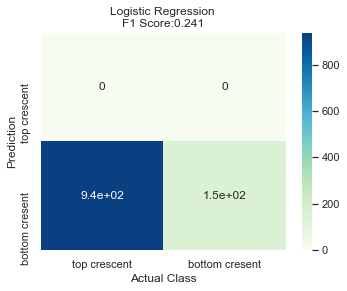

In [521]:
# plot figure
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, cmap="GnBu", annot=True)

#add titles and labels for the axes
plt.title('Logistic Regression \nF1 Score:{0:.3f}'.format(f1_score(y_test, y_pred,pos_label=1)))
plt.ylabel('Prediction')
plt.xlabel('Actual Class')
plt.show()

## Support Vector Machine (SVM):


In [522]:
# import modules
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [523]:
# get moon dataset
X_train, X_test, y_train, y_test = get_data(df_main,.30)

In [524]:
#instantiate classifier object and fit to training data
clf = SVC(kernel="linear", C=0.5)
clf.fit(X_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [525]:
# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred,pos_label=0) 
print('f1 score is = ' + str(f1))

f1 score is = 0.9994107248084856


## SVM with Gaussian Kernel Classification:

In [526]:

# instantiate classifier object and fit to training data
clf = SVC(gamma=2, C=1)
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [527]:
# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, pos_label=0) 
print('f1 score is = ' + str(f1))

f1 score is = 0.9242506811989101


# SVM gives us a f1 score od 99.9 which is the best comparing all the other models.